In [2]:
# import data
import pandas as pd
df = pd.read_csv('data/data.csv')
print(df.head())

            Unnamed: 0  asset_id operational_mode        s1         s2  \
0  2016-01-01 00:00:00        33                a -0.694638  12.680544   
1  2016-01-01 00:05:00        33                a  5.012288  11.264028   
2  2016-01-01 00:10:00        33                a  4.903325  10.882658   
3  2016-01-01 00:15:00        33                a -0.612916  18.496431   
4  2016-01-01 00:20:00        33                a -1.184970  12.108489   

         s3  
0  0.503953  
1  0.953424  
2 -0.081722  
3  3.023717  
4  7.205164  


In [3]:
# quick check the data has the form expected
print(df.nunique())
print(df.info())

Unnamed: 0          56632
asset_id               36
operational_mode        6
s1                   1854
s2                   1811
s3                   2110
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098199 entries, 0 to 1098198
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1098199 non-null  object 
 1   asset_id          1098199 non-null  int64  
 2   operational_mode  1098199 non-null  object 
 3   s1                1098194 non-null  float64
 4   s2                1098199 non-null  float64
 5   s3                1098198 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 50.3+ MB
None


In [4]:
# print summary statistics
print(df.describe())

           asset_id            s1            s2            s3
count  1.098199e+06  1.098194e+06  1.098199e+06  1.098198e+06
mean   1.886065e+01  6.628588e-01  7.255648e+00  4.110601e-01
std    1.021424e+01  6.849083e+00  6.746211e+00  4.754115e+00
min    1.000000e+00 -1.961000e+01 -1.961000e+01 -1.980000e+01
25%    1.000000e+01 -2.870000e+00  3.170000e+00 -2.220000e+00
50%    1.900000e+01  2.700000e-01  7.930000e+00  0.000000e+00
75%    2.800000e+01  4.440000e+00  1.156000e+01  2.720000e+00
max    3.600000e+01  1.995000e+01  2.004000e+01  1.961000e+01


In [5]:
# change date/time to datetime format
df_new = df.rename(columns={'Unnamed: 0': 'Timestamp'})
df_new['Timestamp'] = pd.to_datetime(df_new['Timestamp'])

print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098199 entries, 0 to 1098198
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Timestamp         1098199 non-null  datetime64[ns]
 1   asset_id          1098199 non-null  int64         
 2   operational_mode  1098199 non-null  object        
 3   s1                1098194 non-null  float64       
 4   s2                1098199 non-null  float64       
 5   s3                1098198 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 50.3+ MB
None


In [6]:
print(df_new['Timestamp'].max())
print(df_new['Timestamp'].min())


2016-07-15 15:15:00
2016-01-01 00:00:00


In [7]:
# duplicates

duplicates = df_new.duplicated()
print(duplicates)

0          False
1          False
2          False
3          False
4          False
           ...  
1098194    False
1098195    False
1098196    False
1098197    False
1098198    False
Length: 1098199, dtype: bool


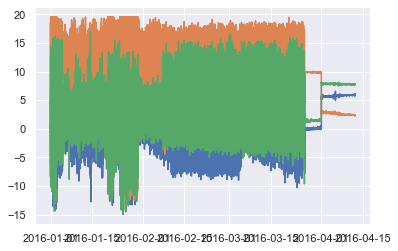

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

asset_id_filter=33
asset_id33 = df_new[df_new['asset_id']  ==  asset_id_filter]

plt.plot(asset_id33['Timestamp'], asset_id33['s1'])
plt.plot(asset_id33['Timestamp'], asset_id33['s2'])
plt.plot(asset_id33['Timestamp'], asset_id33['s3'])
plt.show()
# plt.plot(df_new.where(df_new['asset_id'] == asset_id_filter)['Timestamp'], int(df_new.where(df_new['asset_id'] == asset_id_filter)['operational_mode']))

In [58]:
asset_id33.diff['operational_mode']

0        a
1        a
2        a
3        a
4        a
        ..
29448    e
29449    e
29450    e
29451    e
29452    e
Name: operational_mode, Length: 29453, dtype: object

In [9]:
df_new.where(df_new['asset_id'] == asset_id_filter)['operational_mode']

0            a
1            a
2            a
3            a
4            a
          ... 
1098194    NaN
1098195    NaN
1098196    NaN
1098197    NaN
1098198    NaN
Name: operational_mode, Length: 1098199, dtype: object

In [56]:
# Creeate new DF where only single asset it
asset_id_filter=33
asset_id33 = df_new[df_new['asset_id']  ==  asset_id_filter]

from math import floor 

floor(len(asset_id33)*0.8)
# create vector of len(ass_id) of true
# set top 20% to false (test)


23562

In [ ]:
asset_id_filter = 33


In [47]:
df_new['operational_mode'].unique()

array(['a', 'b', 'c', 'd', 'f', 'e'], dtype=object)